# The relationship between Co-Emmissions, Fuel Costs and Engine Capacity of the Vechiles

## Importing necessary libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tabulate import tabulate
from colorama import Fore, Style
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates
import warnings


## Data cleaning 

In [2]:
df = pd.read_csv("C:\\Users\\Nsuku\\Documents\\Honors in information Sy\\Learning From Data\\CarsOnfuels.csv")
df.head()

,Year,Manufacturer,Model,Description,Transmission,Transmission_type,Engine_capacity,Fuel_type,Co_emissions,Fuel_cost_6000_miles;;
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,M5,Manual,1598,Petrol,980,618;;
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,M5,Manual,1747,Petrol,1105,633;;
2,2000,Alfa Romeo,145 Range,Cloverleaf,M5,Manual,1970,Petrol,1103,663;;
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,M5,Manual,1598,Petrol,980,626;;
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,M5,Manual,1747,Petrol,1105,633;;


### Check number of columns 

In [3]:
#Checking for number of columns
df.columns

Index(['Year', 'Manufacturer', 'Model', 'Description', 'Transmission',
       'Transmission_type', 'Engine_capacity', 'Fuel_type', 'Co_emissions',
       'Fuel_cost_6000_miles;;'],
      dtype='object')

### Removing the original column (with semicolon) and  Create a new column (without semicolon) 

In [4]:

#the original column (with semicolon) is 'Fuel_cost_6000_miles;;'
original_column_name = 'Fuel_cost_6000_miles;;'

# Create a new column (without semicolon) 
cleaned_column_name = 'Fuel_cost_miles'  # Choose a column name

df[cleaned_column_name] = pd.to_numeric(df[original_column_name].str.replace(';;', '', regex=True), errors='coerce')

# Drop the original column
df = df.drop(original_column_name, axis=1)
df.head()

,Year,Manufacturer,Model,Description,Transmission,Transmission_type,Engine_capacity,Fuel_type,Co_emissions,Fuel_cost_miles
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,M5,Manual,1598,Petrol,980,618.0
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,M5,Manual,1747,Petrol,1105,633.0
2,2000,Alfa Romeo,145 Range,Cloverleaf,M5,Manual,1970,Petrol,1103,663.0
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,M5,Manual,1598,Petrol,980,626.0
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,M5,Manual,1747,Petrol,1105,633.0


### Checking the data types and replacing data that numeric to float

In [5]:
df.dtypes

Year                  object
Manufacturer          object
Model                 object
Description           object
Transmission          object
Transmission_type     object
Engine_capacity       object
Fuel_type             object
Co_emissions          object
Fuel_cost_miles      float64
dtype: object

In [6]:
# If it's not a numerical type (e.g., object), try conversion (replace with desired type if different)
if df['Co_emissions'].dtypes == 'object':
  try:
    df['Co_emissions'] = pd.to_numeric(df['Co_emissions'], errors='coerce')
  except:
    print("Conversion to numerical type failed. Consider alternative visualizations for categorical data.")

if df['Engine_capacity'].dtypes == 'object':
  try:
    df['Engine_capacity'] = pd.to_numeric(df['Engine_capacity'], errors='coerce')
  except:
    print("Conversion to numerical type failed. Consider alternative visualizations for categorical data.")


In [7]:
df.dtypes


Year                  object
Manufacturer          object
Model                 object
Description           object
Transmission          object
Transmission_type     object
Engine_capacity      float64
Fuel_type             object
Co_emissions         float64
Fuel_cost_miles      float64
dtype: object

### Checking empty spaces and replacing blank spaces with mean

In [8]:
df.isnull().sum()


Year                    0
Manufacturer          901
Model                 901
Description           901
Transmission          901
Transmission_type     901
Engine_capacity       906
Fuel_type             901
Co_emissions          975
Fuel_cost_miles      1074
dtype: int64

In [9]:
#replacing blank spaces with mean
df['Co_emissions'] = df['Co_emissions'].fillna(df['Co_emissions'].mean())
df['Fuel_cost_miles'] = df['Fuel_cost_miles'].fillna(df['Fuel_cost_miles'].mean())
df['Engine_capacity'] = df['Engine_capacity'].fillna(df['Engine_capacity'].mean())


### Dropping the empty spaces

In [10]:

df1=df.dropna()
df1.isnull().sum()


Year                 0
Manufacturer         0
Model                0
Description          0
Transmission         0
Transmission_type    0
Engine_capacity      0
Fuel_type            0
Co_emissions         0
Fuel_cost_miles      0
dtype: int64

### Checking for information data

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9248 entries, 0 to 10148
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9248 non-null   object 
 1   Manufacturer       9248 non-null   object 
 2   Model              9248 non-null   object 
 3   Description        9248 non-null   object 
 4   Transmission       9248 non-null   object 
 5   Transmission_type  9248 non-null   object 
 6   Engine_capacity    9248 non-null   float64
 7   Fuel_type          9248 non-null   object 
 8   Co_emissions       9248 non-null   float64
 9   Fuel_cost_miles    9248 non-null   float64
dtypes: float64(3), object(7)
memory usage: 794.8+ KB


### Display the top 20 manufacturers (highest counts) and display unique manufacturers

In [12]:

result=df1.groupby('Manufacturer')['Manufacturer'].agg("count").sort_values(ascending=False)

print(result.head(20))

df1['Manufacturer'].nunique()

Manufacturer
Mercedes-Benz     986
Ford              827
Volkswagen        703
BMW               540
Renault           477
Volvo             465
Honda             415
Peugeot           369
Citroen           335
Mitsubishi        281
Skoda             246
Fiat              240
Toyota            220
Audi              220
MG Rover Group    208
Mazda             199
Hyundai           184
Alfa Romeo        177
Proton            161
Suzuki            153
Name: Manufacturer, dtype: int64


83

### Checking for outliers in the dataset and choose the maximum quantile to fill in the outliers

<Axes: >

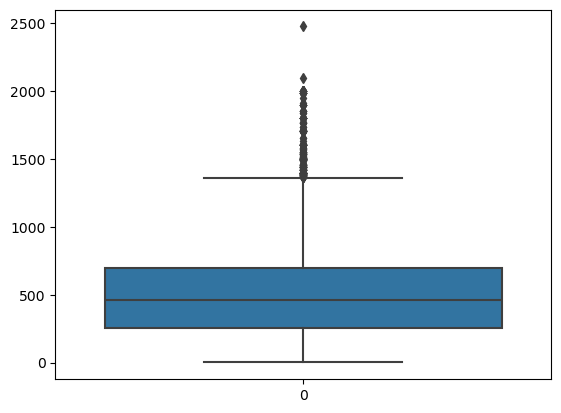

In [13]:

sns.boxplot(df1["Co_emissions"])

In [14]:
#choose the maximum quantile to fill in the outliers
max_Co_emissions = df1["Co_emissions"].quantile(0.995)
max_Co_emissions 

1757.4799999999814

In [15]:
df1[df1["Co_emissions"] > max_Co_emissions]

,Year,Manufacturer,Model,Description,Transmission,Transmission_type,Engine_capacity,Fuel_type,Co_emissions,Fuel_cost_miles
978,2000,Nissan,Serena - C23 Series,1.6 GX 5 door,M5,Manual,1597.0,Petrol,1909.0,731.000000
1246,2000,Saab,9-5 Series 4 Door Saloon,3.0 V6 Ecopower 200hp B308E,A4NE,Automatic,2962.0,Petrol,1840.0,838.000000
1253,2000,Saab,9-5 Series 5 Door Estate,3.0 V6 Ecopower 200hp B308E,A4NE,Automatic,2962.0,Petrol,1840.0,858.000000
2139,2001,Daewoo Cars,Nubira,2.0 CDX Estate (DOHC),M5,Manual,1998.0,Petrol,1800.0,616.000000
2593,2001,Lotus,Esprit,Esprit Sport 350,M5,Manual,3506.0,Petrol,1984.0,1136.000000
2595,2001,Lotus,Esprit,Esprit V8,M5,Manual,3506.0,Petrol,1984.0,1136.000000
2597,2001,Lotus,Esprit,Esprit V8 GT,M5,Manual,3506.0,Petrol,1984.0,1136.000000
2986,2001,Nissan,Terrano II - R20 Series,2.4 Petrol 3 door,M5,Manual,2389.0,Petrol,1765.0,863.000000
2987,2001,Nissan,Terrano II - R20 Series,2.4 Petrol 5 door,M5,Manual,2389.0,Petrol,1765.0,889.000000
2988,2001,Nissan,Terrano II - R20 Series,2.7 Turbo Diesel 3 door,A4,Automatic,2664.0,Diesel,1765.0,800.000000


### Assigning the new data to a new dataframe and confirm the change

In [16]:

df2 = df1[df1["Co_emissions"]<max_Co_emissions]

<Axes: >

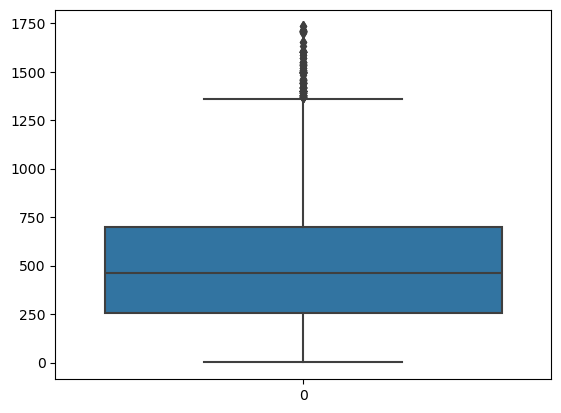

In [17]:

sns.boxplot(df2["Co_emissions"])

### Checking for duplicates values and droping all duplicated values

In [18]:

df2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10144    False
10145    False
10146    False
10147    False
10148    False
Length: 9201, dtype: bool

In [19]:

df3 =df2.drop_duplicates()

In [20]:
#confirm the change
df3.duplicated().sum()

0

### Saving the new dataset into csv file

In [21]:

df3.to_csv("Cleaned_data.csv")

## Open the clean data

In [22]:
df = pd.read_csv("C:\\Users\\Nsuku\\CarsOnFuel_dataset\\Cleaned_data.csv")
df = df.drop('Unnamed: 0', axis=1)
df.head()


,Year,Manufacturer,Model,Description,Transmission,Transmission_type,Engine_capacity,Fuel_type,Co_emissions,Fuel_cost_miles
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,M5,Manual,1598.0,Petrol,980.0,618.0
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,M5,Manual,1747.0,Petrol,1105.0,633.0
2,2000,Alfa Romeo,145 Range,Cloverleaf,M5,Manual,1970.0,Petrol,1103.0,663.0
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,M5,Manual,1598.0,Petrol,980.0,626.0
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,M5,Manual,1747.0,Petrol,1105.0,633.0


## Descriptive Statistics

Calculate sum 
Calculate mean 
Calculate max
Calculate min
Calculate count
Calculate median
Calculate mode
Calculate skewness
Calculate kurtosis
Calculate range
Calculate variance
Calculate variance
Calculate standard deviation
Calculate interquartile range
Calculate coefficient of variation
Calculate geometric mean

In [33]:

# Create an empty list to store statistics
statistics = []
statisticss = []

# Iterate through each column
for cols in numeric_columns:

   
    total = round(df[cols].sum())
    
    mean = round(df[cols].mean(), 2)

    maximum = round(df[cols].max(), 2)
   
    minimum = round(df[cols].min(), 2)

    count = df[cols].count()

    median = df[cols].median()

    
    mode = df[cols].mode()

    
    skew = round(df[cols].skew(), 2)

   
    kurt = round(df[cols].kurt(), 2)

    
    data_range = round(df[cols].max() - df[cols].min(), 2)

    # Calculate variance
    variance = round(df[cols].var(), 2)

    # Append statistics to the list
    statisticss.append([cols, total, mean, maximum, minimum, count, median, mode, skew, kurt, data_range, variance])

# Define headers for the table
header = [Fore.BLUE + Style.BRIGHT +"Column", "Total", "Mean", "Max", "Min", "Count", "Median", "Mode", "Skewness", "Kurtosis", "Range", "Variance" + Style.RESET_ALL]
separator = [Style.BRIGHT + "-" * 15, "-" * 8, "-" * 8, "-" * 8, "-" * 8 + Style.RESET_ALL]
print("\n".join(tabulate(statisticss, headers=header, tablefmt="fancy_grid", numalign="center", colalign="center").split('\n', 1)))


# Iterate through each column
for col in numeric_columns:

    # Calculate variance
    variance = round(df[col].var(), 2)

    # Calculate standard deviation
    std_dev = round(df[col].std(), 2)

    # Calculate quartiles
    Q1 = np.percentile(df[col], 25)
    Q2 = np.percentile(df[col], 50)
    Q3 = np.percentile(df[col], 75)

    # Calculate interquartile range
    iqr_capacity = Q3 - Q1
    
 # Calculate coefficient of variation
    coefficient_variation = std_dev / mean * 100  # Multiply by 100 for percentage

    # Calculate geometric mean
    geometric_mean = stats.gmean(df[col])
    
    # Append statistics to the list
    statistics.append([col, std_dev,  Q1,  Q2,  Q3, iqr_capacity, coefficient_variation, geometric_mean,])


# Print the formatted table with headings and color formatting
header = [Fore.BLUE + Style.BRIGHT + "Column","Standard Deviation", "Quartile 1", "Quartile 2", "Quartile 3", "Interquartile range", "Co_efficient", "Geometric_mean" + Style.RESET_ALL]
separator = [Style.BRIGHT + "-" * 15, "-" * 8, "-" * 8, "-" * 8, "-" * 8 + Style.RESET_ALL]
print("\n".join(tabulate(statistics, headers=header, tablefmt="fancy_grid", numalign="center", colalign="center").split('\n', 1)))

╒═════════════════╤══════════╤═════════╤═══════╤═══════╤═════════╤══════════╤═════════╤════════════╤════════════╤═════════╤════════════╕
│          Column │    Total │    Mean │   Max │   Min │   Count │  Median  │  Mode   │  Skewness  │  Kurtosis  │  Range  │  Variance  │
╞═════════════════╪══════════╪═════════╪═══════╪═══════╪═════════╪══════════╪═════════╪════════════╪════════════╪═════════╪════════════╡
│ Engine_capacity │ 20152255 │ 2191.89 │ 7990  │ 34    │ 9194    │   1995   │  1998   │    2.01    │    5.87    │  7956   │   794631   │
├─────────────────┼──────────┼─────────┼───────┼───────┼─────────┼──────────┼─────────┼────────────┼────────────┼─────────┼────────────┤
│ Co_emissions    │ 4664284  │ 507.32  │ 1733  │ 1     │ 9194    │   460    │   200   │    0.87    │    0.47    │  1732   │   105281   │
├─────────────────┼──────────┼─────────┼───────┼───────┼─────────┼──────────┼─────────┼────────────┼────────────┼─────────┼────────────┤
│ Fuel_cost_miles │ 5719194  │ 622.06  │ 

C:\Users\Nsuku\anaconda3\Lib\site-packages\tabulate\__init__.py:827: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  conv(string)
C:\Users\Nsuku\anaconda3\Lib\site-packages\tabulate\__init__.py:1232: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return format(float(val), floatfmt)


Failing to removing the warning message 

### Z score calculation

In [34]:

z_score = (df['Fuel_cost_miles'] - mean)/std_dev
print("Z score: ", z_score)

Z score:  0      -0.021880
1       0.058957
2       0.220629
3       0.021233
4       0.058957
          ...   
9189    0.538586
9190    0.614033
9191    0.732593
9192    0.985881
9193    0.985881
Name: Fuel_cost_miles, Length: 9194, dtype: float64


## Data Visualizations

### Histogram

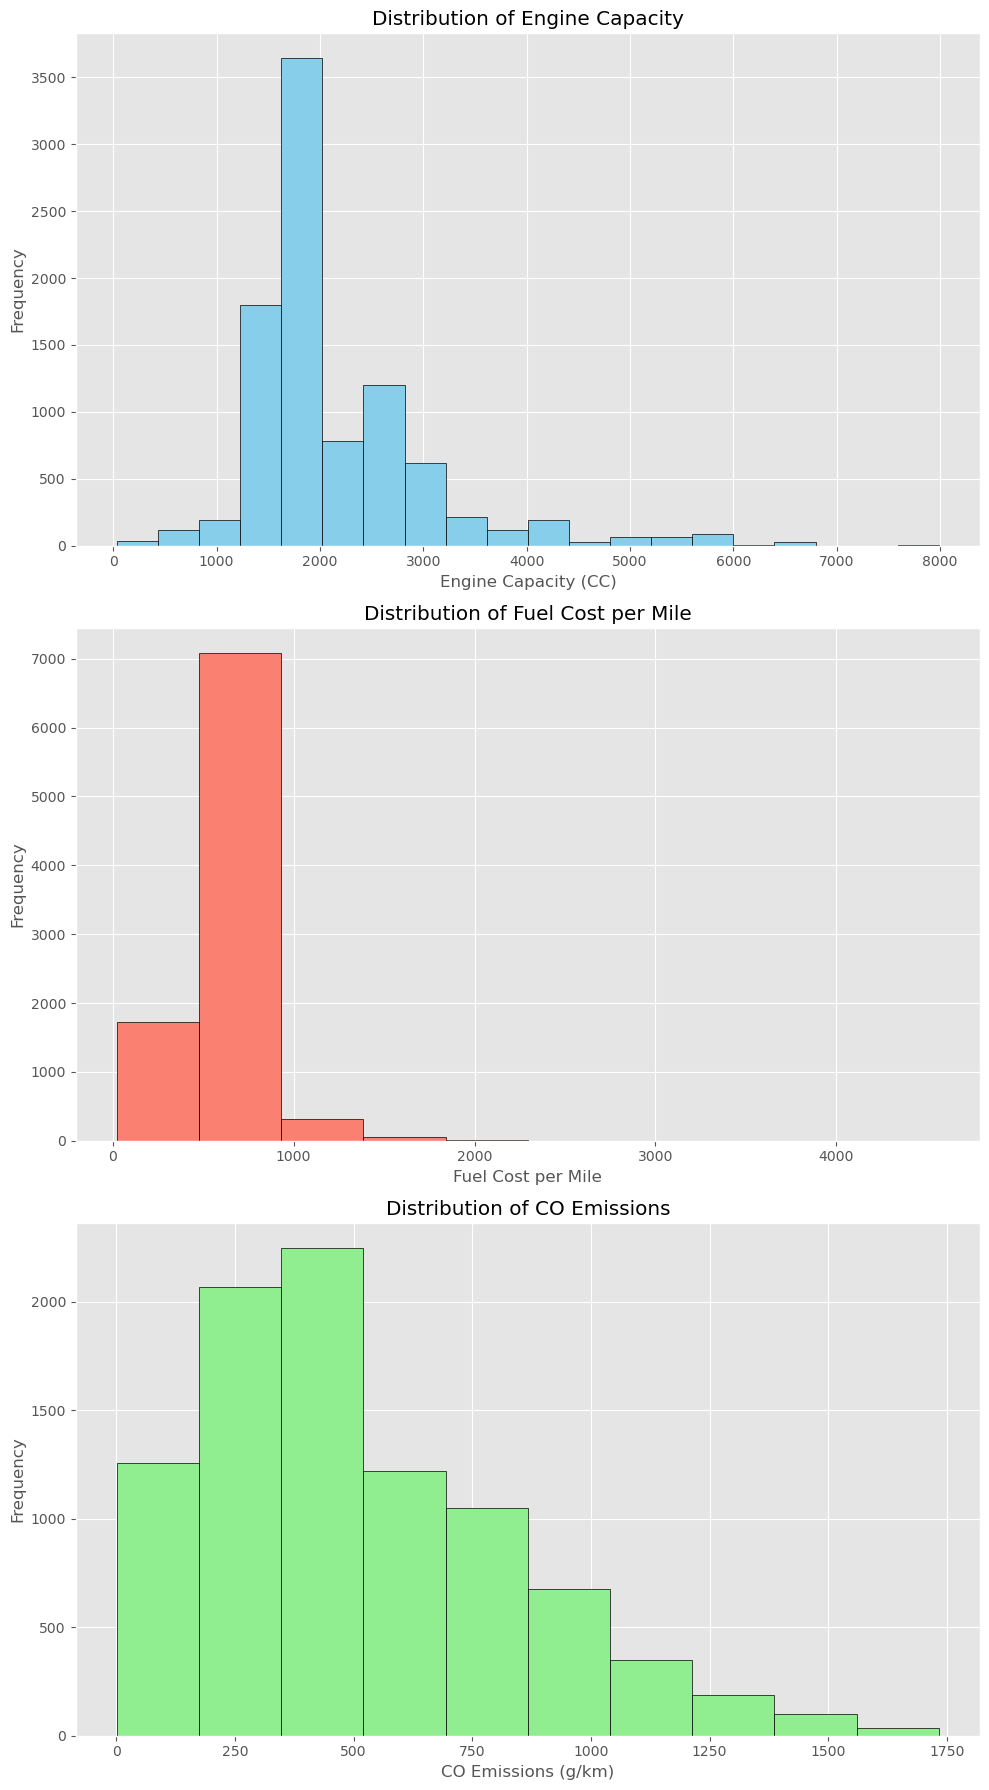

In [35]:
# Set a common style for all plots
plt.style.use('ggplot')

# Create a figure and axes
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Create a histogram for Engine Capacity
axs[0].hist(df['Engine_capacity'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_xlabel("Engine Capacity (CC)")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Distribution of Engine Capacity")

# Create a histogram for Fuel_cost_miles
axs[1].hist(df['Fuel_cost_miles'], color='salmon', edgecolor='black')
axs[1].set_xlabel("Fuel Cost per Mile")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Fuel Cost per Mile")

# Create a histogram for Co_emissions
axs[2].hist(df['Co_emissions'], color='lightgreen', edgecolor='black')
axs[2].set_xlabel("CO Emissions (g/km)")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of CO Emissions")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


### 3D scatter plot

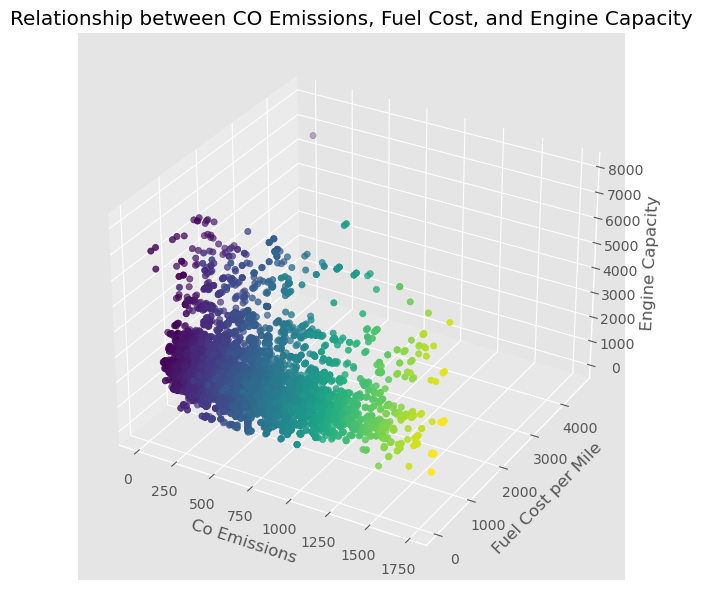

In [36]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors based on Co_emissions values
sc = ax.scatter(df['Co_emissions'], df['Fuel_cost_miles'], df['Engine_capacity'], c=df['Co_emissions'], cmap='viridis', marker='o')

# Labeling
ax.set_xlabel('Co Emissions ')
ax.set_ylabel('Fuel Cost per Mile ')
ax.set_zlabel('Engine Capacity ')
ax.set_title('Relationship between CO Emissions, Fuel Cost, and Engine Capacity')


# Show plot
plt.tight_layout()
plt.show()


#### Comments
The data points are distributed on along z-axis, is engine capacity. But the larger engines might tend to be slightly deeper in the z-axis (colored yellow or red) and the fuel costs could potentially be higher toward the back (y-axis). It means that larger high-pollutant engines could also be less fuel-efficient.

### Violin Plot

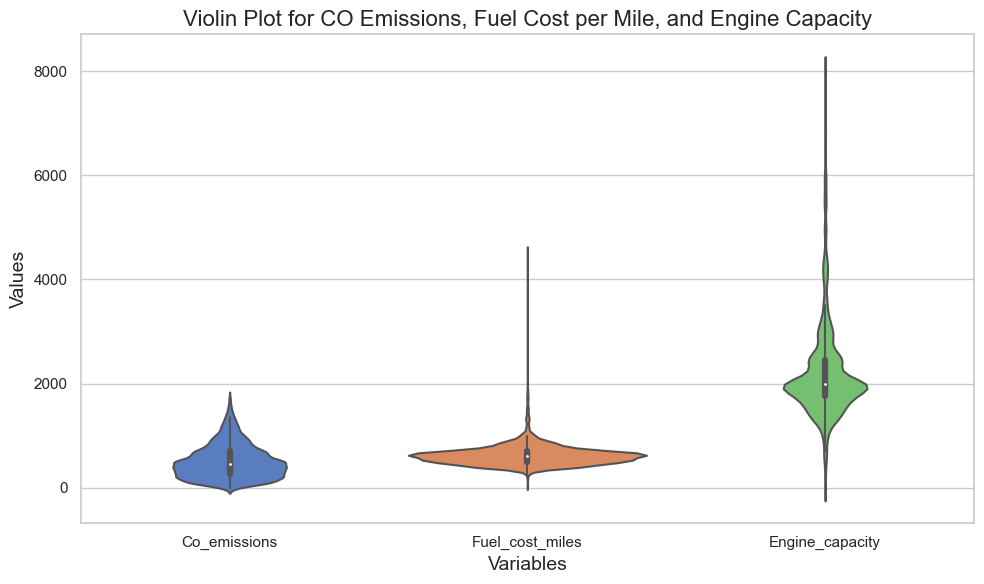

In [37]:

# Set style
sns.set(style="whitegrid")

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['Co_emissions', 'Fuel_cost_miles', 'Engine_capacity']], palette="muted", split=True)

# Add labels and title
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.title("Violin Plot for CO Emissions, Fuel Cost per Mile, and Engine Capacity", fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


#### Comments
Shown here is the Violin Plot for CO Emissions, Fuel Cost per Mile, and Engine Capacity distribution of vehicles. Wider areas show the areas of more the data exist. For Co Emissions, most values are the middle, with some quite high, and a few much lower. This kind of fuel is divided everywhere so that you can't tell the central cost. Engine Capacity covers the maximum with the bigger engines, but also the central area of the engine sizes.

### Plot heatmap

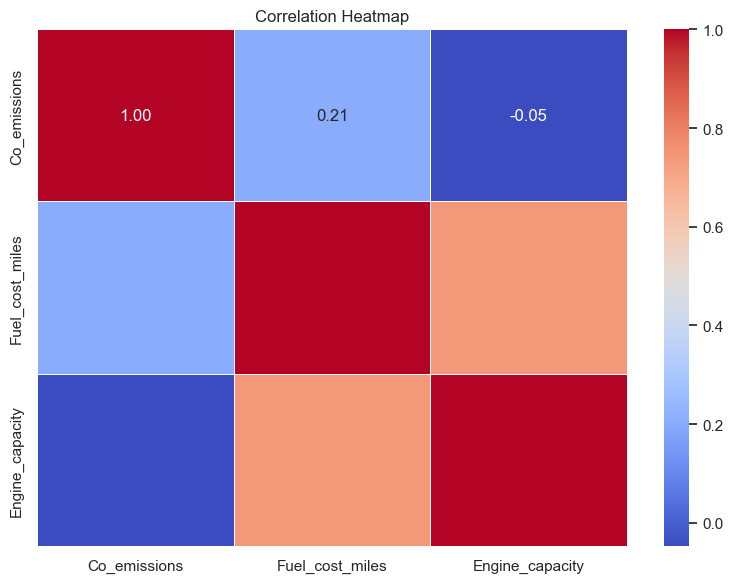

In [38]:
# Calculate correlation matrix
corr = df[['Co_emissions', 'Fuel_cost_miles', 'Engine_capacity']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.tight_layout()
plt.show()


#### Comments
The heatmap shows the relationships between Co_emissions, Fuel Cost per Mile and Engine Capacity. Each color represents the strength and direction of the correlation. 
The red color represent the positive correlation which shows that one value goes up and the other goes down.
The Blue color represent the negative correlation which shows that one value goes down and the other goes up.
The White color shows weaker connection between the data

### Line Plot

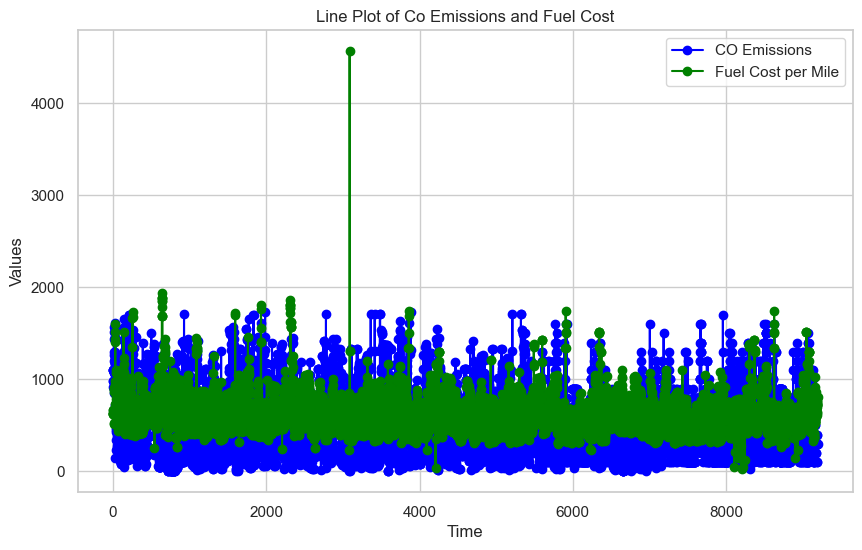

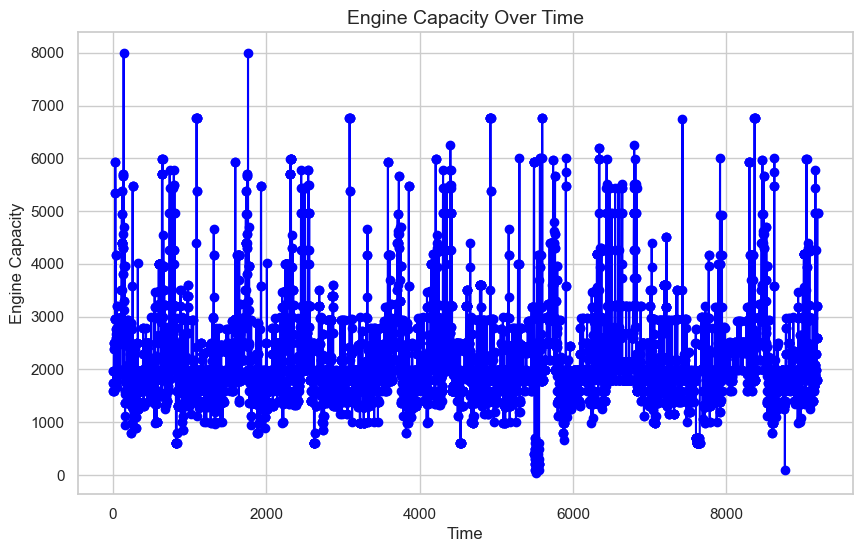

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Co_emissions'], marker='o', linestyle='-', color='blue')
plt.plot(df.index, df['Fuel_cost_miles'], marker='o', linestyle='-', color='green')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plot of Co Emissions and Fuel Cost')
plt.legend(['CO Emissions', 'Fuel Cost per Mile'], loc='upper right')
plt.show()

# Set figure size
plt.figure(figsize=(10, 6))

# Create line plot for engine capacity
plt.plot(df.index, df['Engine_capacity'], marker='o', color='blue', linestyle='-')

# Set title and axis labels
plt.title('Engine Capacity Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Engine Capacity', fontsize=12)

# Show plot
plt.grid(True)
plt.show()


### Box and Wiskey Plot

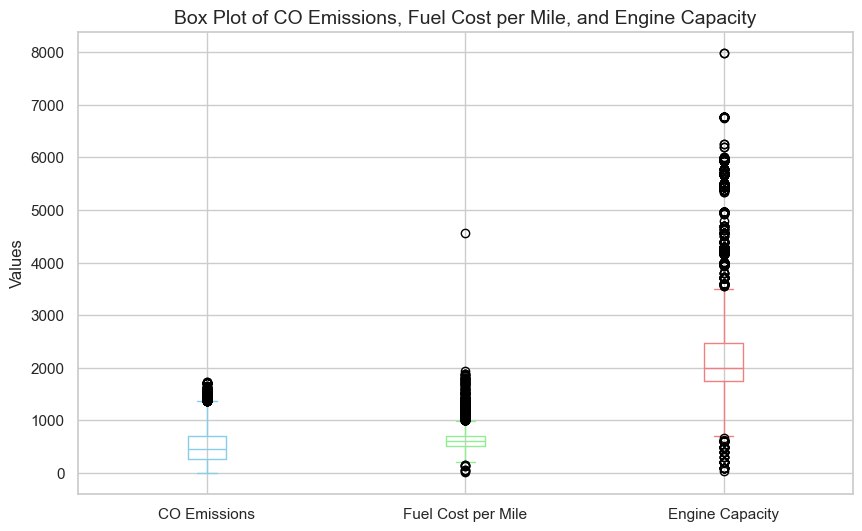

In [40]:
# Set figure size
plt.figure(figsize=(10, 6))

box_colors = ['skyblue', 'lightgreen', 'lightcoral']

for i, column in enumerate(['Co_emissions', 'Fuel_cost_miles', 'Engine_capacity']):
    df[[column]].boxplot(color=box_colors[i], positions=[i+1])

# Set x-axis ticks and labels
plt.xticks([1, 2, 3], ['CO Emissions', 'Fuel Cost per Mile', 'Engine Capacity'])

# Set title and axis labels
plt.title('Box Plot of CO Emissions, Fuel Cost per Mile, and Engine Capacity', fontsize=14)
plt.ylabel('Values', fontsize=12)

# Show plot
plt.show()


The box plot visualizes the distribution of three car features which is Co Emissions, Fuel Cost per Mile, and Engine Capacity.

oO Emission distribution seems teappear centeredd

Fuel cost per Mile estimation seems to be less definitve.

Engine Capacity is the largest in terms of sange.

### Density Plot

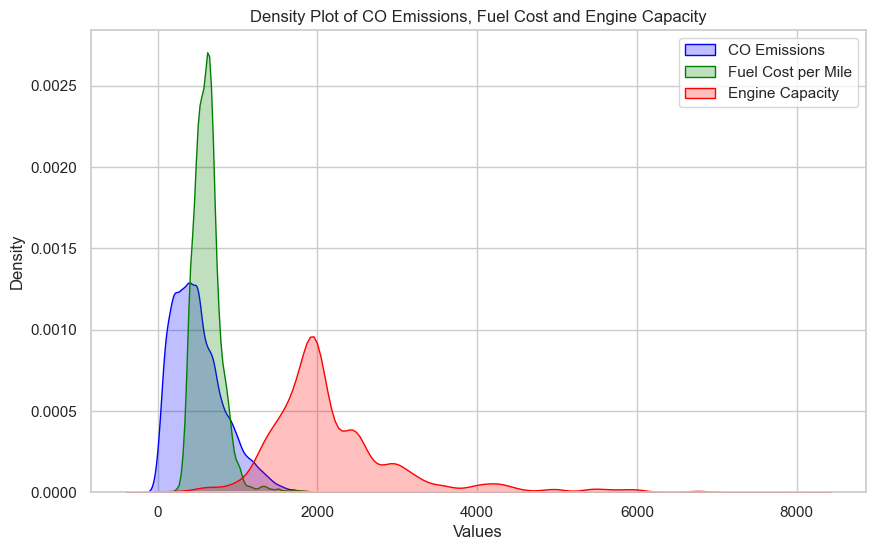

In [41]:
warnings.filterwarnings("ignore", category=FutureWarning)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Co_emissions'], shade=True, color="blue", label="CO Emissions")
sns.kdeplot(data=df['Fuel_cost_miles'], shade=True, color="green", label="Fuel Cost per Mile")
sns.kdeplot(data=df['Engine_capacity'], shade=True, color="red", label="Engine Capacity")
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of CO Emissions, Fuel Cost and Engine Capacity')
plt.legend()
plt.show()


### Hexbin Plot

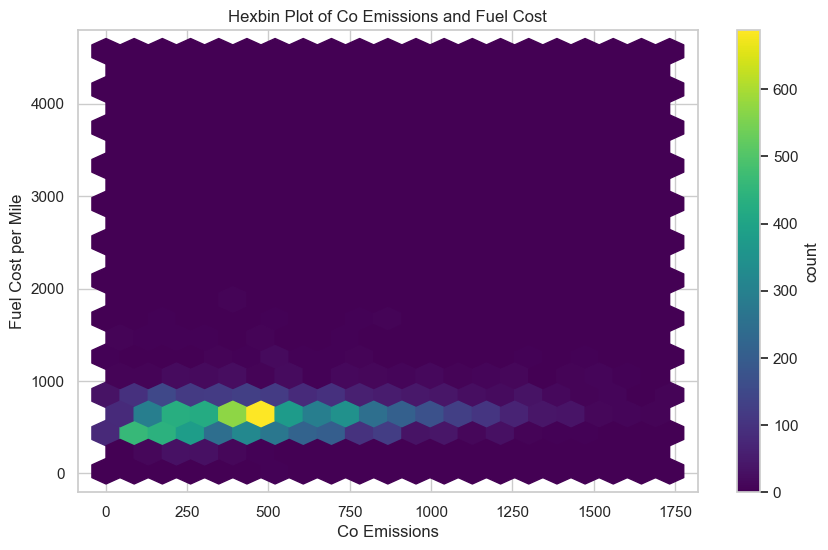

In [42]:

plt.figure(figsize=(10, 6))
plt.hexbin(df['Co_emissions'], df['Fuel_cost_miles'], gridsize=20, cmap='viridis')
plt.xlabel('Co Emissions')
plt.ylabel('Fuel Cost per Mile')
plt.title('Hexbin Plot of Co Emissions and Fuel Cost')
plt.colorbar(label='count')
plt.show()



The graph shows the relationship between the amount of Carbon emissions (Co Emissions) and the fuel cost per mile for different vehicles. Each hexbin represents a cluster of data points, with brighter colors indicating more data points in that area. The left side of the graph shows vehicles 
with lower Co Emissions, while the right side represents vehicles with higher emissions.

### Parallel coordinates plot

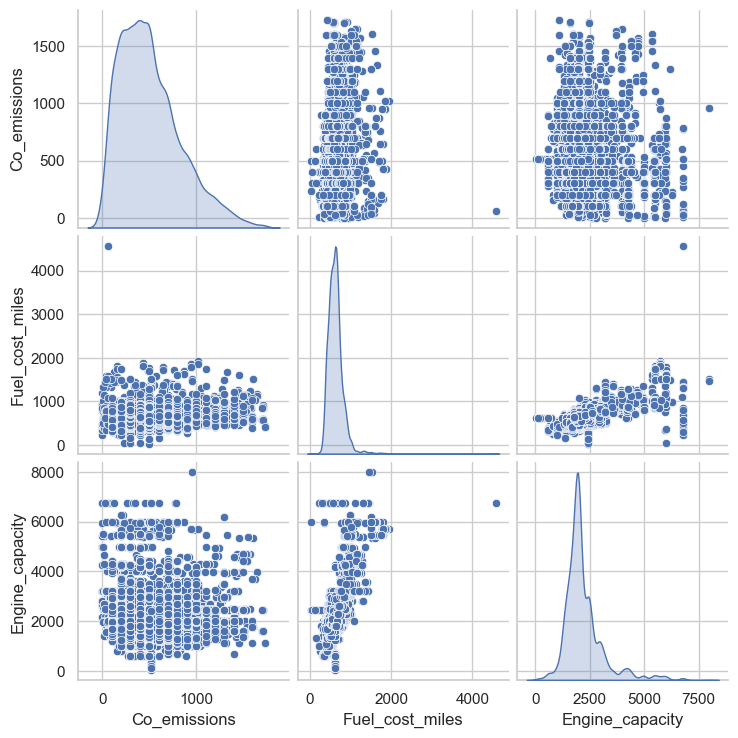

In [43]:

warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")


sns.pairplot(df[['Co_emissions', 'Fuel_cost_miles', 'Engine_capacity']], diag_kind="kde")
plt.show()


I tried all my best to fix the below warning so the best option i come with was to ignore the warning
C:\Users\Nsuku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nsuku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nsuku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):

### Empirical Cumulative Distribution Funtion

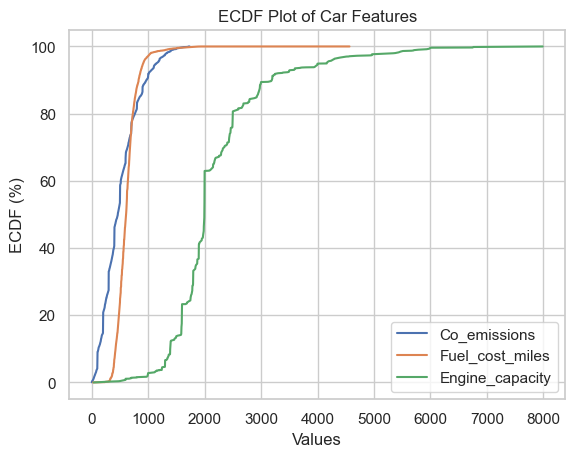

In [44]:
cols = ['Co_emissions', 'Fuel_cost_miles', 'Engine_capacity']

# Create a new figure for the plot
plt.figure()

# Iterate through each column
for col in cols:
  # Sort the data in ascending order 
  sorted_data = df[col].sort_values()

  # Calculate the ECDF values (percentage)
  ecdf = (sorted_data.rank() - 1) / len(sorted_data) * 100

  # Plot the ECDF for each column
  plt.plot(sorted_data.values, ecdf, label=col)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('ECDF (%)')
plt.title('ECDF Plot of Car Features')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)  # Add gridlines for better readability
plt.show()

## Reflection


Excel suits small datasets, simple tasks, ease of use and collaboration and sharing, but encounters difficulties handling bigger datasets as Loading, cleaning, and analyzing big datasets becomes challenging and time-consuming and production of interactive visualizations is limited. Python works with large amounts of data fast and it allows you to automate the repetitive cleaning tasks, saving your time and reducing the number of mistakes. Most importantly, it has a choice of more powerful data analyzing and visualization tools.

Deciding whether to Excel or Python for data analysis is the same as getting the appropriate tool for the job done. In the case of Excel, it is very helpful with the smaller datasets e.g. when you want to make quick calculations or you want to share data easily with the others. It is easy in usage and works well for standard tasks. But if you meet with a tempest of data which you have no idea how to handle, then Python is the best option. When handling large clusters, it does it fast and systematizes the mundane tasks, which in turn reduces productivity time. Furthermore Python has jumpers that are used in the cleansing of data, construction of graphs, complex calculations and odds that simply mess Excel.

If I could retake my task over once again, I would rather data set that fits my current abilities. Despite the fact I do know how to work with super big or somewhat messy data, however, at this moment, I think so it's still a little bit of a concentrate for me. A smaller, cleaner backyard would mean I could concentrate on getting the analysis right and using the coolest methods that I know. On top of that, I would make sure to use language that is simple, yet comprehensive so that everyone can comprehend the results easily. In fact, the right information will surely prove that I have what it takes

To tell you the truth, I am not expert in data analysis yet, my cognitive skills related to this concept are being developed. Currently, I believe I would need some support in problems that are related to general cleaning to data that looks like a mess and very particular statistics things. Besides, I have still many libraries in Python to learn. However, it is very hard to identify a real cause of such a complicated error which occurs in the code. And yes, I might fail sometimes, but hey, I'm learning and improving everyday. I am actually autodidact. Every time I get more puzzles done, I get smarter myself.

## Resources 